In [1]:
# Import Libraries

from prophet import Prophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

c:\Users\mattd\Anaconda3\envs\Mattsenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Import Data

# Start Date

start_date = '1990-01'

# End Date

end_date = '2022-01'

# Date for splitting training and testing dataset

train_end_date = '2017-01'

In [4]:
# Pull Data

ticker_list = ['Soil Temperature', 'ATM Temperature', 'Precipitation', 'FCH4']

data = pd.read_csv(r'C:\Users\mattd\OneDrive\Desktop\All Variables Normalized (Monthly).csv', index_col=None)

In [5]:
data.head()

,Date,Soil Temperature,ATM Temperature,Precipitation,FCH4,FC02
0,1990-01,0.199048,0.318696,0.125,NaN,NaN
1,1990-02,0.195987,0.247233,0.080,NaN,NaN
2,1990-03,0.211290,0.451848,0.165,NaN,NaN
3,1990-04,0.261292,0.614434,0.200,NaN,NaN
4,1990-05,0.464234,0.744290,0.070,NaN,NaN


In [6]:
data.shape

(384, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              384 non-null    object 
 1   Soil Temperature  360 non-null    float64
 2   ATM Temperature   360 non-null    float64
 3   Precipitation     360 non-null    float64
 4   FCH4              138 non-null    float64
 5   FC02              156 non-null    float64
dtypes: float64(5), object(1)
memory usage: 18.1+ KB


In [8]:
data.describe()

,Soil Temperature,ATM Temperature,Precipitation,FCH4,FC02
count,360.000000,360.000000,360.000000,138.000000,156.000000
mean,0.483630,0.577532,0.215042,0.290409,-1.195249
std,0.273789,0.274214,0.143303,0.259345,1.132722
min,0.000000,0.000000,0.010000,0.000000,-4.464104
25%,0.227813,0.335472,0.100000,0.067196,-2.033580
50%,0.438840,0.603190,0.185000,0.177581,-0.703443
75%,0.770244,0.835855,0.311250,0.479078,-0.333326
max,1.000000,1.000000,0.890000,1.000000,0.086111


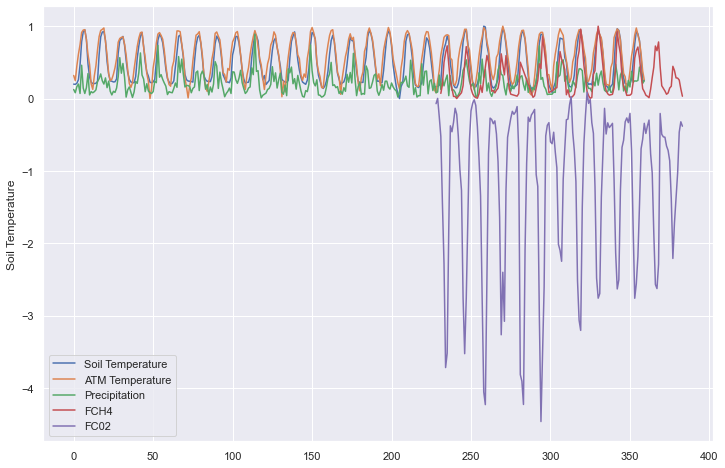

In [12]:
# Visualize data using seaborn with NULL VALUES

sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data.index, y=data['Soil Temperature'])
sns.lineplot(x=data.index, y=data['ATM Temperature'])
sns.lineplot(x=data.index, y=data['Precipitation'])
sns.lineplot(x=data.index, y=data['FCH4'])
sns.lineplot(x=data.index, y=data['FC02'])
plt.legend(['Soil Temperature', 'ATM Temperature', 'Precipitation', 'FCH4', 'FC02'])

In [118]:
# calculate missing values % contribution in DF

data_null = data.isna().mean().round(4) * 100

data_null.sort_values(ascending=False).head()

FCH4                64.06
Soil Temperature     6.25
ATM Temperature      6.25
Precipitation        6.25
Date                 0.00
dtype: float64

In [119]:
data_auto = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [120]:
data_auto.head()

,Date,FCH4,Soil Temperature,ATM Temperature,Precipitation
231,2009-04,0.071228,0.240701,0.600659,0.125
232,2009-05,0.193036,0.543311,0.712856,0.265
233,2009-06,0.500794,0.688074,0.845891,0.175
234,2009-07,0.631155,0.757159,0.872381,0.260
235,2009-08,0.729016,0.864987,0.881446,0.325


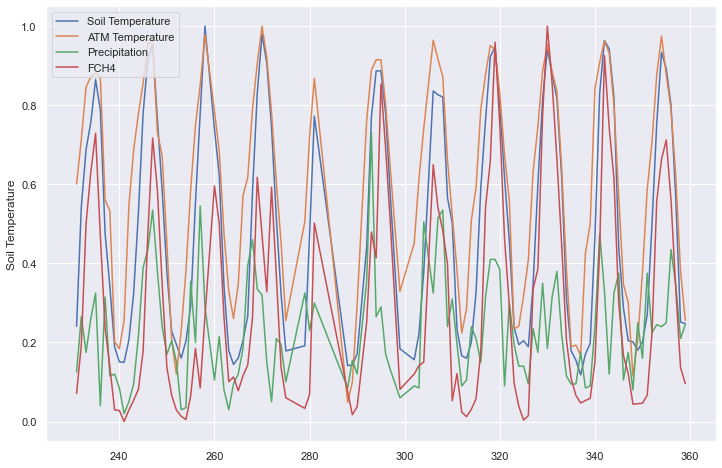

In [121]:
# Visualize data using seaborn WITHOUT NULL VALUES

sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data_auto.index, y=data_auto['Soil Temperature'])
sns.lineplot(x=data_auto.index, y=data_auto['ATM Temperature'])
sns.lineplot(x=data_auto.index, y=data_auto['Precipitation'])
sns.lineplot(x=data_auto.index, y=data_auto['FCH4'])
plt.legend(['Soil Temperature', 'ATM Temperature', 'Precipitation', 'FCH4'])

Prophet requires at least two columns as inputs: a DS column and a Y column.

DS column has the time information - resent index and rename date to ds.

Y column has the time series values. We are predicting FCH4, so FCH4 will be changed to Y.

Keep Predictor Variables (Soil Temp, ATM Temp, and Precip. as original column names)

In [140]:
data = pd.read_csv(r'C:\Users\mattd\OneDrive\Desktop\All Variables Normalized (Monthly).csv', header=0)

In [141]:
data

,Date,FCH4,Soil Temperature,ATM Temperature,Precipitation
0,1990-01,NaN,0.199048,0.318696,0.125
1,1990-02,NaN,0.195987,0.247233,0.080
2,1990-03,NaN,0.211290,0.451848,0.165
3,1990-04,NaN,0.261292,0.614434,0.200
4,1990-05,NaN,0.464234,0.744290,0.070
...,...,...,...,...,...
379,2021-08,0.285278,NaN,NaN,NaN
380,2021-09,0.282468,NaN,NaN,NaN
381,2021-10,0.255345,NaN,NaN,NaN
382,2021-11,0.133537,NaN,NaN,NaN


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              384 non-null    object 
 1   FCH4              138 non-null    float64
 2   Soil Temperature  360 non-null    float64
 3   ATM Temperature   360 non-null    float64
 4   Precipitation     360 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.1+ KB


In [143]:
data['Date'] = pd.DatetimeIndex(data['Date'])

data.dtypes

Date                datetime64[ns]
FCH4                       float64
Soil Temperature           float64
ATM Temperature            float64
Precipitation              float64
dtype: object

In [144]:
data = data.rename(columns={'Date': 'ds', 'FCH4': 'y'})

data.head()

,ds,y,Soil Temperature,ATM Temperature,Precipitation
0,1990-01-01,NaN,0.199048,0.318696,0.125
1,1990-02-01,NaN,0.195987,0.247233,0.080
2,1990-03-01,NaN,0.211290,0.451848,0.165
3,1990-04-01,NaN,0.261292,0.614434,0.200
4,1990-05-01,NaN,0.464234,0.744290,0.070


In [145]:
# Check Correlation

data.corrwith(data["y"])

y                   1.000000
Soil Temperature    0.879174
ATM Temperature     0.773326
Precipitation       0.435706
dtype: float64

In [146]:
# Train test split
train = data[data['ds'] <= train_end_date]
test = data[data['ds'] > train_end_date]
# Check the shape of the dataset
print(train.shape)
print(test.shape)

(325, 5)
(59, 5)


Based on the threshold data (train_end_date) set prior, there are 325 data points in the training dataset and 59 data points in the testing dataset.

Checking the minimum & maximum values for the train and test dataset separately gives us starting and ending dates.

In [147]:
# Check the start and end time of the training and testing dataset
print('The start time of the training dataset is ', train['ds'].min())
print('The end time of the training dataset is ', train['ds'].max())
print('The start time of the testing dataset is ', test['ds'].min())
print('The end time of the testing dataset is ', test['ds'].max())

The start time of the training dataset is  1990-01-01 00:00:00
The end time of the training dataset is  2017-01-01 00:00:00
The start time of the testing dataset is  2017-02-01 00:00:00
The end time of the testing dataset is  2021-12-01 00:00:00


In [148]:
# Baseline Model

# Use the default hyperparameters to initiate the Prophet model
model_baseline = Prophet()
# Fit the model on the training dataset
model_baseline.fit(train)

12:33:05 - cmdstanpy - INFO - Chain [1] start processing
12:33:06 - cmdstanpy - INFO - Chain [1] done processing


Univariate baseline model using defauly propher hyperparameters - and fit the model using the training datset.

Prophet automatically fits daily, weekly, and yearly seasonalities if the time series is more than 2 cycles long.

Daily seasonality is disables because we don't have sub-daily time series.

To make forecast, we need to first create a future dataframe (periods = 59) means that we would like to make predictions fo the next 59 days. Training dataset has 59 points.

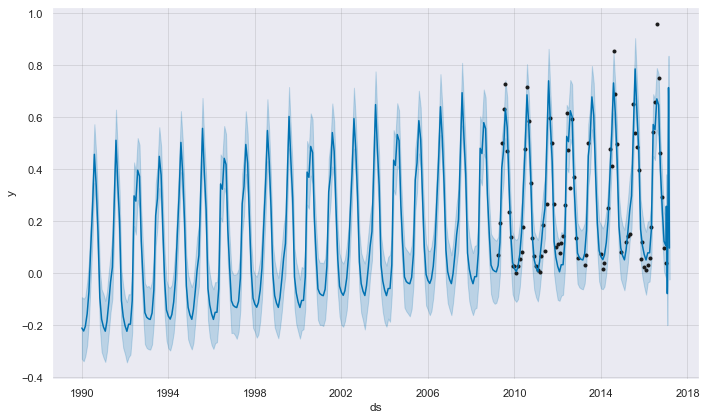

In [153]:
# Create the time range for the forecast
future_baseline = model_baseline.make_future_dataframe(periods=59)
# Make prediction
forecast_baseline = model_baseline.predict(future_baseline)
# Visualize the forecast
model_baseline.plot(forecast_baseline); # Add semi-colon to remove the duplicated chart

Black dots are the actual values.
Blue line is the prediction.

Blue shades are the uncertainty interval - default value for the uncertainty interval is 80% (above). The uncertainty interval is calculated based on the assumption that the average frequency and magnitude of trend changes in the future will be the same as the historical data. The historical data trend changes are projected forward to get the uncertainty intervals [1].

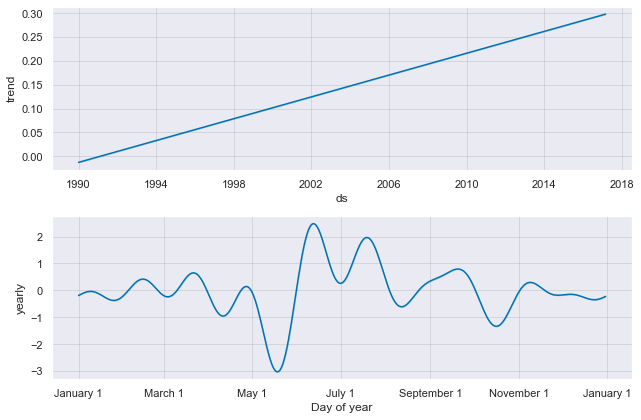

In [154]:
# Visualize the forecast components
model_baseline.plot_components(forecast_baseline);

In addition to forecast plot, prophet also provides a components plot. From the component plot chart, we can see FCH4 has experienced a linear increase.

Yearly seasonality shows FCH4 is highest in Summer (July) and tapers off in January.

In [155]:
# Merge actual and predicted values
performance_baseline = pd.merge(test, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-16:], on='ds')
# Check MAE value
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 0.08166736405931616
The MAPE for the baseline model is 5.5243584285419844


Next we need to check the model performance. The forecast dataframe doesn't include the actual values, so we need to merge the forecast dataframe with the test dataframe to compare the actual values with the predicted values.

Mean absolute error (MAE) for the baseline mode is 0.08, meaning that on average, the forecast is off by 0.08 (emisison value?)

The mean absolute percent error (MAPE) for the baseline model is 5.5%, meaning that on average, the forecast is off by 5.5 of the FHC4 emission value.

In [162]:
# Add seasonality
model_season = Prophet(yearly_seasonality=True, weekly_seasonality=True)

# Fit the model on the training dataset
model_season.fit(train)

12:49:38 - cmdstanpy - INFO - Chain [1] start processing
12:49:38 - cmdstanpy - INFO - Chain [1] done processing


Tune the model to make better estimations - force the model to consider yearly seasonlity.

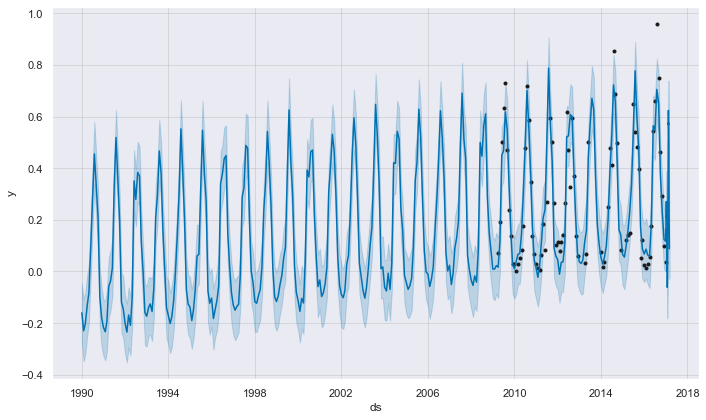

In [163]:
# Create the time range for the forecast
future_season = model_season.make_future_dataframe(periods=59)
# Make prediction
forecast_season = model_season.predict(future_season)
# Visualize the forecast
model_season.plot(forecast_season); # Add semi-colon to remove the duplicated chart

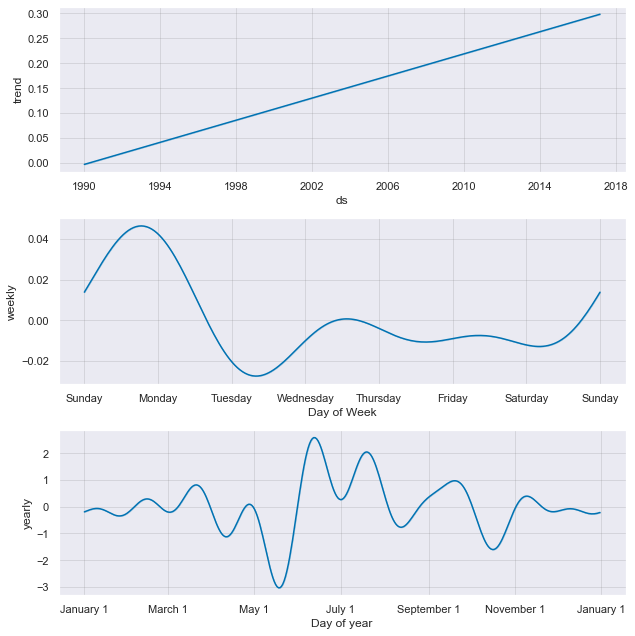

In [164]:
# Visualize the forecast components
model_season.plot_components(forecast_season);

In [171]:
# Merge actual and predicted values
performance_season = pd.merge(test, forecast_season[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-59:], on='ds')
# Check MAE value
performance_season_MAE = mean_absolute_error(performance_season['y'], performance_season['yhat'])
print(f'The MAE for the seasonality model is {performance_season_MAE}')
# Check MAPE value
performance_season_MAPE = mean_absolute_percentage_error(performance_season['y'], performance_season['yhat'])
print(f'The MAPE for the seasonality model is {performance_season_MAPE}')

The MAE for the seasonality model is 0.07173003812511836
The MAPE for the seasonality model is 12.077605306965483


Build a Multivariate Model - add Soil Temperature as predictor using the "add_regressor" function. Standardize = False means the regressor won't be standardized (we already did this separately)

In [166]:
# Add seasonality 
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# Add regressor
model_multivariate.add_regressor('Soil Temperature', standardize=False)
# Fit the model on the training dataset
model_multivariate.fit(train)

12:52:26 - cmdstanpy - INFO - Chain [1] start processing
12:52:26 - cmdstanpy - INFO - Chain [1] done processing


Missing values will be populated using .fillna(method='ffill') which fills the missing value with the previous day's data.

In [172]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=59)
# Append the regressor values
future_multivariate = pd.merge(future_multivariate, data[['ds', 'Soil Temperature']], on='ds', how='inner')
# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')
# Check the data
future_multivariate.tail(10)

,ds,Soil Temperature
317,2016-06-01,0.762324
318,2016-07-01,0.922102
319,2016-08-01,0.948396
320,2016-09-01,0.798892
321,2016-10-01,0.614794
322,2016-11-01,0.457710
323,2016-12-01,0.237800
324,2017-01-01,0.194514
325,2017-02-01,0.204632
326,2017-03-01,0.189018


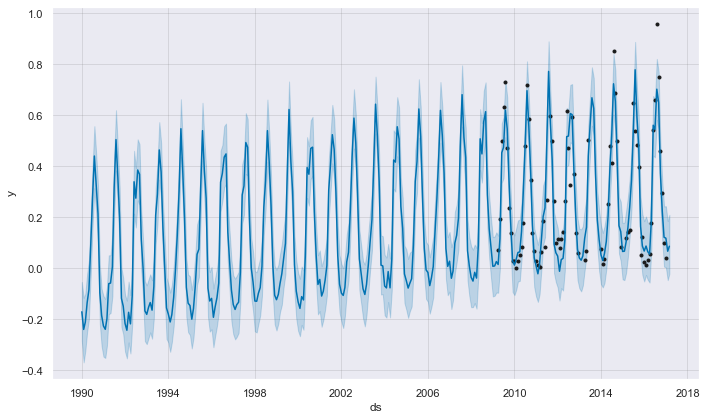

In [173]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)
# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

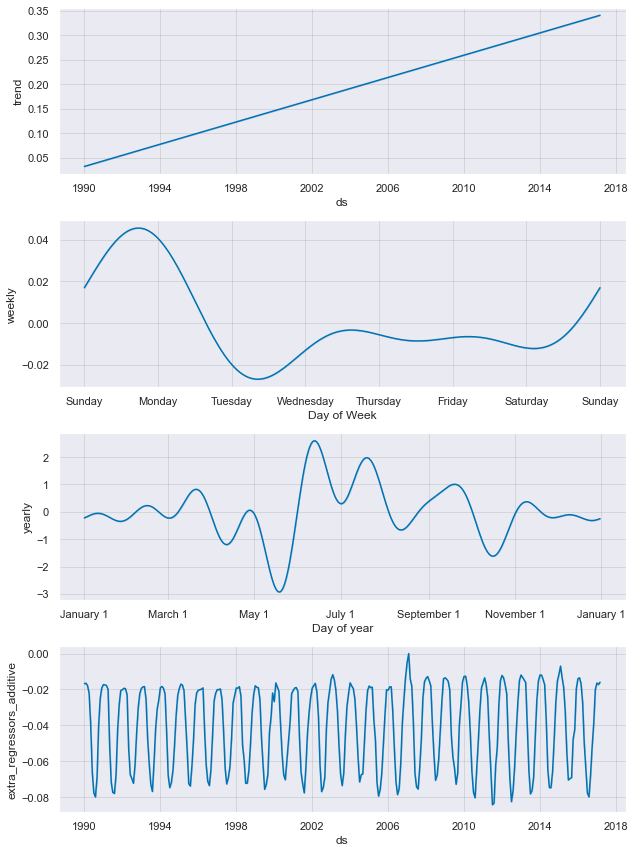

In [174]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [175]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-59:], on='ds')
# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')
# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

The MAE for the multivariate model is 0.06718650072466023
The MAPE for the multivariate model is 11.00480334387511


In [182]:
# Add seasonality 
model_multivariate = Prophet(yearly_seasonality=True)
# Add regressor
model_multivariate.add_regressor('Soil Temperature', standardize=False)
# Add regressor
model_multivariate.add_regressor('ATM Temperature', standardize=False)
# Add regressor
model_multivariate.add_regressor('Precipitation', standardize=False)
# Fit the model on the training dataset
model_multivariate.fit(train)

13:00:36 - cmdstanpy - INFO - Chain [1] start processing
13:00:36 - cmdstanpy - INFO - Chain [1] done processing


In [183]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=59)
# Append the regressor values
future_multivariate = pd.merge(future_multivariate, data[['ds', 'Soil Temperature', 'ATM Temperature', 'Precipitation']], on='ds', how='inner')
# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')
# Check the data
future_multivariate.tail(10)

,ds,Soil Temperature,ATM Temperature,Precipitation
317,2016-06-01,0.762324,0.878032,0.315
318,2016-07-01,0.922102,0.951260,0.410
319,2016-08-01,0.948396,0.940311,0.410
320,2016-09-01,0.798892,0.829409,0.385
321,2016-10-01,0.614794,0.673652,0.090
322,2016-11-01,0.457710,0.559454,0.300
323,2016-12-01,0.237800,0.233930,0.195
324,2017-01-01,0.194514,0.241465,0.140
325,2017-02-01,0.204632,0.318342,0.140
326,2017-03-01,0.189018,0.408641,0.095


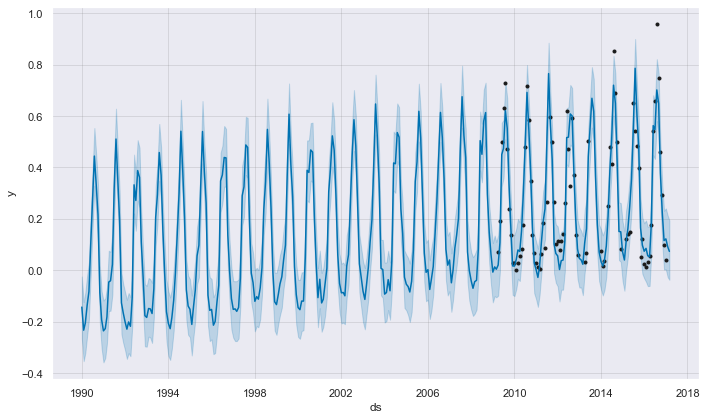

In [179]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)
# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart

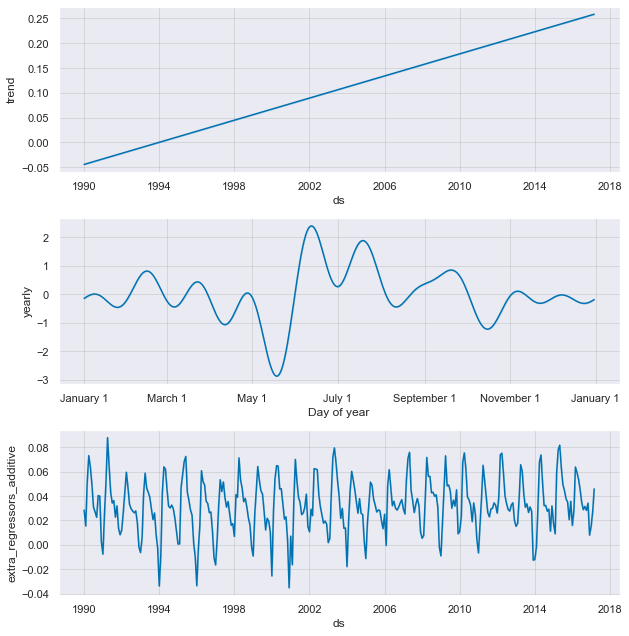

In [184]:
# Visualize the forecast components
model_multivariate.plot_components(forecast_multivariate);

In [185]:
# Merge actual and predicted values
performance_multivariate = pd.merge(test, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-59:], on='ds')
# Check MAE value
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the multivariate model is {performance_multivariate_MAE}')
# Check MAPE value
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the multivariate model is {performance_multivariate_MAPE}')

The MAE for the multivariate model is 0.07335847045379779
The MAPE for the multivariate model is 13.971494067508889


In [186]:
# Create the time range for the forecast
future_multivariate = model_multivariate.make_future_dataframe(periods=24, freq='MS')
# Append the regressor values
future_multivariate = pd.merge(future_multivariate, data[['ds', 'Soil Temperature', 'ATM Temperature', 'Precipitation']], on='ds', how='inner')
# Fill the missing values with the previous value
future_multivariate = future_multivariate.fillna(method='ffill')
# Check the data
future_multivariate.tail(10)

,ds,Soil Temperature,ATM Temperature,Precipitation
339,2018-04-01,0.197388,0.499058,0.090
340,2018-05-01,0.466475,0.842006,0.240
341,2018-06-01,0.831041,0.909112,0.475
342,2018-07-01,0.963771,0.962562,0.330
343,2018-08-01,0.942505,0.932305,0.120
344,2018-09-01,0.819726,0.800801,0.325
345,2018-10-01,0.440516,0.570874,0.375
346,2018-11-01,0.286653,0.347069,0.105
347,2018-12-01,0.204033,0.301154,0.175
348,2019-01-01,0.201519,0.114551,0.080


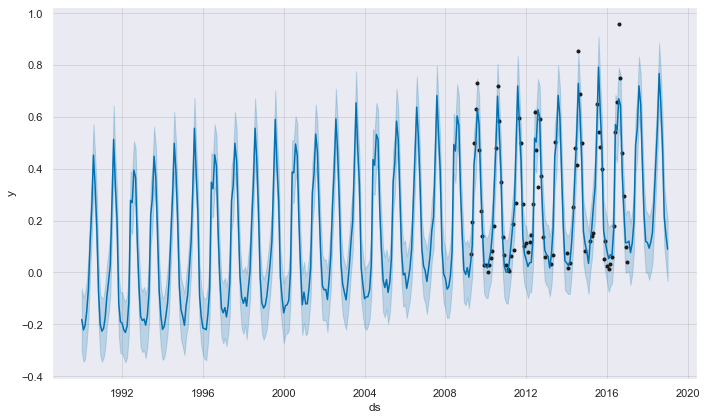

In [187]:
# Make prediction
forecast_multivariate = model_multivariate.predict(future_multivariate)
# Visualize the forecast
model_multivariate.plot(forecast_multivariate); # Add semi-colon to remove the duplicated chart